170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

Training Custom CNN Model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.6606 - loss: 0.8485
Epoch 1: val_loss improved from inf to 3.55740, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 170ms/step - accuracy: 0.6609 - loss: 0.8473 - val_accuracy: 0.4930 - val_loss: 3.5574 - learning_rate: 0.0010
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7746 - loss: 0.4864
Epoch 2: val_loss improved from 3.55740 to 2.53911, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.7747 - loss: 0.4863 - val_accuracy: 0.4950 - val_loss: 2.5391 - learning_rate: 9.5000e-04
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8102 - loss: 0.4216
Epoch 3: val_loss improved from 2.53911 to 0.60291, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 164ms/step - accuracy: 0.8102 - loss: 0.4216 - val_accuracy: 0.7690 - val_loss: 0.6029 - learning_rate: 9.0250e-04
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - 

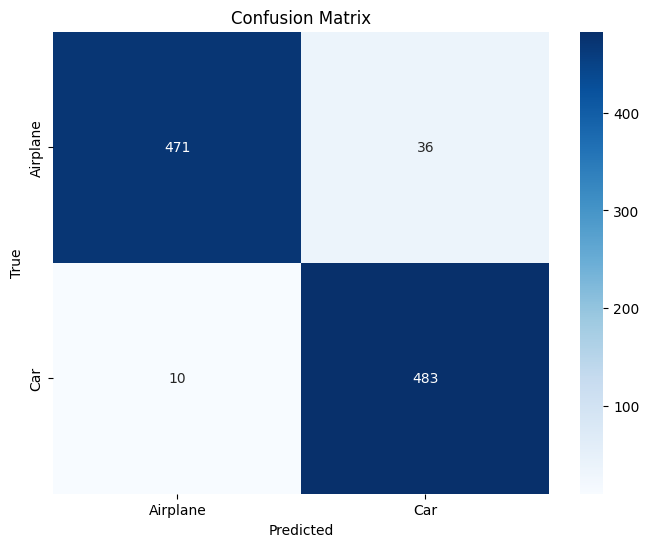

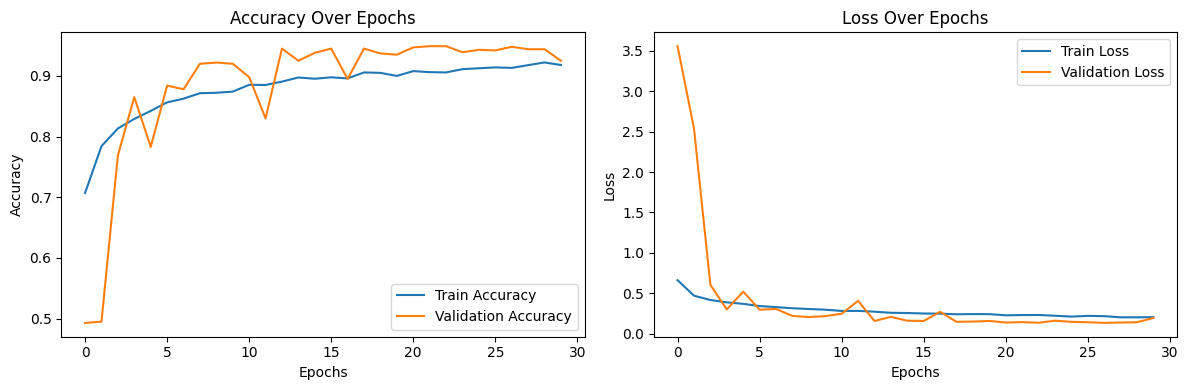

Please upload an image file (or press 'Cancel' to stop):


Saving R (2).jpg to R (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: Airplane (Confidence: 0.01)


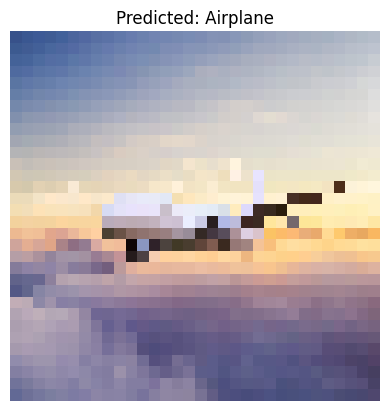

Please upload an image file (or press 'Cancel' to stop):


Saving R (1).jpg to R (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: Car (Confidence: 1.00)


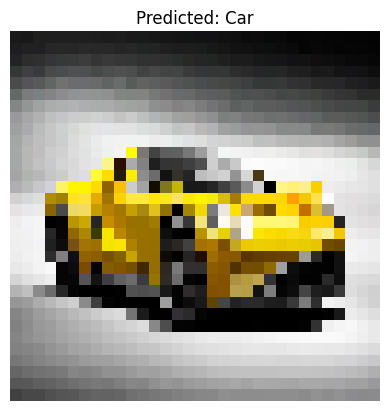

Please upload an image file (or press 'Cancel' to stop):


Saving R (2).jpg to R (2) (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: Airplane (Confidence: 0.01)


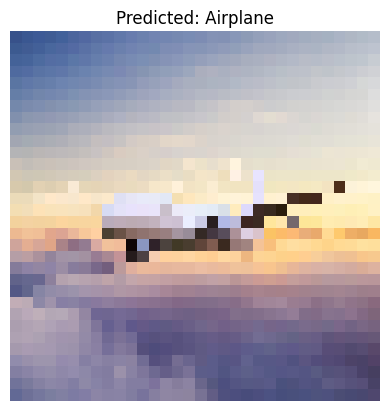

Please upload an image file (or press 'Cancel' to stop):


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def load_data():
    """
    Load and preprocess the CIFAR-10 dataset, keeping only the 'Airplane' and 'Car' classes.
    Split the test set into validation and test subsets.
    """
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Filter data for only 'Car' (label 1) and 'Airplane' (label 0)
    train_filter = np.isin(y_train.flatten(), [0, 1])
    test_filter = np.isin(y_test.flatten(), [0, 1])

    x_train, y_train = x_train[train_filter], y_train[train_filter]
    x_test, y_test = x_test[test_filter], y_test[test_filter]

    # Map labels: Airplane (0) -> 0, Car (1) -> 1
    y_train = y_train.flatten()
    y_test = y_test.flatten()

    # Split data into 80% trian & 10% test & 10% eval
    test_size = len(x_test) // 2
    x_val, y_val = x_test[:test_size], y_test[:test_size]
    x_test, y_test = x_test[test_size:], y_test[test_size:]

    return x_train, y_train, x_val, y_val, x_test, y_test

def preprocess_data(x, y):
    """
    Normalize pixel values of the images and return data.
    """
    x = x.astype("float32") / 255.0
    return x, y

def build_cnn_model():
    """
    Build a custom CNN model for binary classification.
    """
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_vgg16_model():
    """
    Build a transfer learning model using VGG16 as the base.
    """
    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    vgg_base.trainable = False  # Freeze the base model

    model = models.Sequential([
        vgg_base,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_model(model, x_train, y_train, x_val, y_val):
    """
    Train the given model using data augmentation and return the training history.
    """
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zoom_range=0.2
    )
    datagen.fit(x_train)

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    lr_schedule = callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.95 ** epoch)
    early_stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    model_checkpoint = callbacks.ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )

    history = model.fit(
        datagen.flow(x_train, y_train, batch_size=64),
        validation_data=(x_val, y_val),
        epochs=30,
        callbacks=[lr_schedule, early_stopping, model_checkpoint]
    )
    return history

def evaluate_model(model, x_test, y_test):
    """
    Evaluate the model and display metrics including a confusion matrix.
    """
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    y_pred = (model.predict(x_test) > 0.5).astype("int32").flatten()
    y_true = y_test

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=["Airplane", "Car"]))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Airplane", "Car"], yticklabels=["Airplane", "Car"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

def plot_training_history(history):
    """
    Plot the training and validation accuracy and loss over epochs.
    """
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Over Epochs')

    plt.tight_layout()
    plt.show()
############################
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

def classify_uploaded_image(model):
    while True:
        print("Please upload an image file (or press 'Cancel' to stop):")

        # رفع الصورة
        uploaded = files.upload()
        if not uploaded:
            print("No files uploaded. Exiting classification.")
            break

        for file_name in uploaded.keys():
            # تحميل الصورة
            img_path = file_name
            img = load_img(img_path, target_size=(32, 32))  # إعادة ضبط الأبعاد
            img_array = img_to_array(img) / 255.0  # تطبيع القيم
            img_array = np.expand_dims(img_array, axis=0)  # إضافة بعد إضافي

            # توقع التصنيف باستخدام النموذج
            prediction = model.predict(img_array)
            predicted_label = "Car" if prediction[0][0] > 0.5 else "Airplane"

            # عرض النتيجة
            print(f"Prediction: {predicted_label} (Confidence: {prediction[0][0]:.2f})")

            # عرض الصورة
            plt.imshow(img)
            plt.title(f"Predicted: {predicted_label}")
            plt.axis("off")
            plt.show()
def main():
    # Load and preprocess data
    x_train, y_train, x_val, y_val, x_test, y_test = load_data()
    x_train, y_train = preprocess_data(x_train, y_train)
    x_val, y_val = preprocess_data(x_val, y_val)
    x_test, y_test = preprocess_data(x_test, y_test)

    # Train and evaluate custom CNN
    print("\nTraining Custom CNN Model...")
    cnn_model = build_cnn_model()
    cnn_history = train_model(cnn_model, x_train, y_train, x_val, y_val)
    print("\nEvaluating Custom CNN Model...")
    evaluate_model(cnn_model, x_test, y_test)
    plot_training_history(cnn_history)

    # Train and evaluate VGG16-based model
    """print("\nTraining VGG16 Transfer Learning Model...")
    vgg_model = build_vgg16_model()
    vgg_history = train_model(vgg_model, x_train, y_train, x_val, y_val)
    print("\nEvaluating VGG16 Transfer Learning Model...")
    evaluate_model(vgg_model, x_test, y_test)
    plot_training_history(vgg_history)"""
    # إضافة خاصية رفع وتصنيف الصور
    classify_uploaded_image(cnn_model)

if __name__ == "__main__":
    main()